In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import torch.nn as nn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from collections import OrderedDict
import torch.optim as optim
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import IPython
import IPython.display
import datetime
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
from keras.optimizers import Adam

In [2]:
df = pd.DataFrame(pd.read_csv('annual_generation_WA.csv'))
redf = pd.DataFrame(pd.read_csv('renewable_generation_WA.csv'))
nrdf = pd.DataFrame(pd.read_csv('nonrenewable_generation_WA.csv'))
#df.pop("Solar Thermal and Photovoltaic")
df

,Hydroelectric Conventional,Solar Thermal and Photovoltaic,Wind,Wood and Wood Derived Fuels,Coal,Petroleum,Natural Gas,Nuclear,Pumped Storage,Other Gases,Other Biomass,Other,Total
0,8.746671e+07,0.0,0.0,1122771.00,7390279.00,42981.00,288058.00,5742027.0,0.0,8460.00,6499.00,3750.00,1.020715e+08
1,8.934240e+07,0.0,0.0,717827.00,7944779.00,31164.00,460424.00,4229868.0,0.0,97467.00,46633.00,3.00,1.028706e+08
2,6.832466e+07,0.0,0.0,1100901.00,9658148.00,25745.00,1273763.00,5692379.0,0.0,234023.00,172810.00,1.00,8.648243e+07
3,6.731238e+07,0.0,0.0,1018120.00,8835079.00,59434.00,3197945.00,7134966.0,0.0,222852.00,214990.00,7.00,8.799578e+07
4,6.557549e+07,0.0,0.0,1018660.00,9831332.00,45419.00,4820582.00,6739749.0,0.0,299161.00,224804.00,31282.00,8.858648e+07
5,8.250015e+07,0.0,0.0,1035788.00,5902945.00,178915.00,4889604.00,6941878.0,0.0,550836.00,197288.00,179.00,1.021976e+08
6,9.851786e+07,0.0,0.0,1121105.00,8067127.00,187236.00,4707267.00,5588000.0,0.0,300221.00,167369.00,1952.00,1.186581e+08
7,1.041706e+08,0.0,0.0,1017734.00,6990519.00,228589.00,2961661.00,6244135.0,0.0,290495.00,222483.00,0.00,1.221262e+08
8,7.981465e+07,0.0,0.0,1120311.00,9312205.00,87043.00,4346349.00,6916065.0,0.0,348881.00,211461.00,1541.00,1.021585e+08
9,9.698938e+07,0.0,0.0,1129311.00,8692479.00,51495.00,3707237.00,6085893.0,0.0,221354.00,206823.00,44.00,1.170840e+08


In [3]:
df_testing = df.Total
df_testing

0     1.020715e+08
1     1.028706e+08
2     8.648243e+07
3     8.799578e+07
4     8.858648e+07
5     1.021976e+08
6     1.186581e+08
7     1.221262e+08
8     1.021585e+08
9     1.170840e+08
10    1.082369e+08
11    8.304867e+07
12    1.027650e+08
13    1.000947e+08
14    1.021651e+08
15    1.019658e+08
16    1.082032e+08
17    1.069902e+08
18    1.108285e+08
19    1.044701e+08
20    1.034727e+08
21    1.152626e+08
22    1.168355e+08
23    1.141729e+08
24    1.163344e+08
25    1.092875e+08
26    1.140866e+08
27    1.159121e+08
28    1.167567e+08
29    1.064636e+08
30    1.161145e+08
31    1.108084e+08
Name: Total, dtype: float64

In [4]:
df

,Hydroelectric Conventional,Solar Thermal and Photovoltaic,Wind,Wood and Wood Derived Fuels,Coal,Petroleum,Natural Gas,Nuclear,Pumped Storage,Other Gases,Other Biomass,Other,Total
0,8.746671e+07,0.0,0.0,1122771.00,7390279.00,42981.00,288058.00,5742027.0,0.0,8460.00,6499.00,3750.00,1.020715e+08
1,8.934240e+07,0.0,0.0,717827.00,7944779.00,31164.00,460424.00,4229868.0,0.0,97467.00,46633.00,3.00,1.028706e+08
2,6.832466e+07,0.0,0.0,1100901.00,9658148.00,25745.00,1273763.00,5692379.0,0.0,234023.00,172810.00,1.00,8.648243e+07
3,6.731238e+07,0.0,0.0,1018120.00,8835079.00,59434.00,3197945.00,7134966.0,0.0,222852.00,214990.00,7.00,8.799578e+07
4,6.557549e+07,0.0,0.0,1018660.00,9831332.00,45419.00,4820582.00,6739749.0,0.0,299161.00,224804.00,31282.00,8.858648e+07
5,8.250015e+07,0.0,0.0,1035788.00,5902945.00,178915.00,4889604.00,6941878.0,0.0,550836.00,197288.00,179.00,1.021976e+08
6,9.851786e+07,0.0,0.0,1121105.00,8067127.00,187236.00,4707267.00,5588000.0,0.0,300221.00,167369.00,1952.00,1.186581e+08
7,1.041706e+08,0.0,0.0,1017734.00,6990519.00,228589.00,2961661.00,6244135.0,0.0,290495.00,222483.00,0.00,1.221262e+08
8,7.981465e+07,0.0,0.0,1120311.00,9312205.00,87043.00,4346349.00,6916065.0,0.0,348881.00,211461.00,1541.00,1.021585e+08
9,9.698938e+07,0.0,0.0,1129311.00,8692479.00,51495.00,3707237.00,6085893.0,0.0,221354.00,206823.00,44.00,1.170840e+08


In [5]:
x= np.arange(32) + 1990
y = df.Total.values
yre = redf.Total.values
ynr = nrdf.Total.values
x

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [6]:
dfy = df
dfy['Year'] = np.arange(1990,2022)

redfy = redf
redfy['Year'] = np.arange(1990,2022)

nrdfy = nrdf
nrdfy['Year'] = np.arange(1990,2022)
nrdfy

,Wood and Wood Derived Fuels,Coal,Petroleum,Natural Gas,Nuclear,Pumped Storage,Other Gases,Other Biomass,Other,Total,Year
0,1122771.00,7390279.00,42981.00,288058.00,5742027.0,0.0,8460.00,6499.00,3750.00,14604825.00,1990
1,717827.00,7944779.00,31164.00,460424.00,4229868.0,0.0,97467.00,46633.00,3.00,13528165.00,1991
2,1100901.00,9658148.00,25745.00,1273763.00,5692379.0,0.0,234023.00,172810.00,1.00,18157770.00,1992
3,1018120.00,8835079.00,59434.00,3197945.00,7134966.0,0.0,222852.00,214990.00,7.00,20683393.00,1993
4,1018660.00,9831332.00,45419.00,4820582.00,6739749.0,0.0,299161.00,224804.00,31282.00,23010989.00,1994
5,1035788.00,5902945.00,178915.00,4889604.00,6941878.0,0.0,550836.00,197288.00,179.00,19697433.00,1995
6,1121105.00,8067127.00,187236.00,4707267.00,5588000.0,0.0,300221.00,167369.00,1952.00,20140277.00,1996
7,1017734.00,6990519.00,228589.00,2961661.00,6244135.0,0.0,290495.00,222483.00,0.00,17955616.00,1997
8,1120311.00,9312205.00,87043.00,4346349.00,6916065.0,0.0,348881.00,211461.00,1541.00,22343856.00,1998
9,1129311.00,8692479.00,51495.00,3707237.00,6085893.0,0.0,221354.00,206823.00,44.00,20094636.00,1999


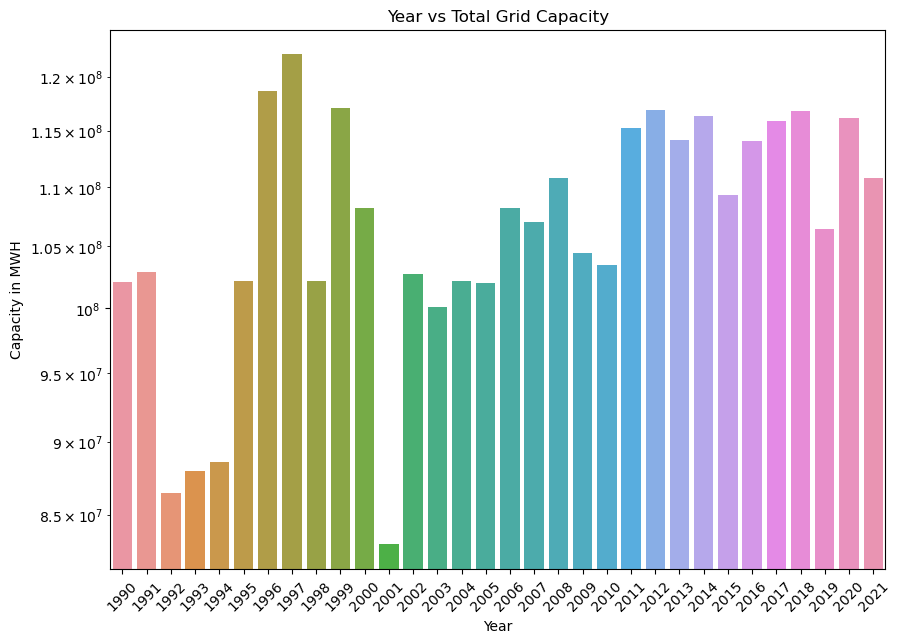

In [7]:
fig=plt.figure(figsize = (10, 7))
bp = sns.barplot(y="Total", x = 'Year',data=dfy)
bp.set_yscale("log")
plt.title('Year vs Total Grid Capacity')
plt.xlabel('Year')
plt.ylabel('Capacity in MWH')
plt.xticks(rotation=45)
plt.show()


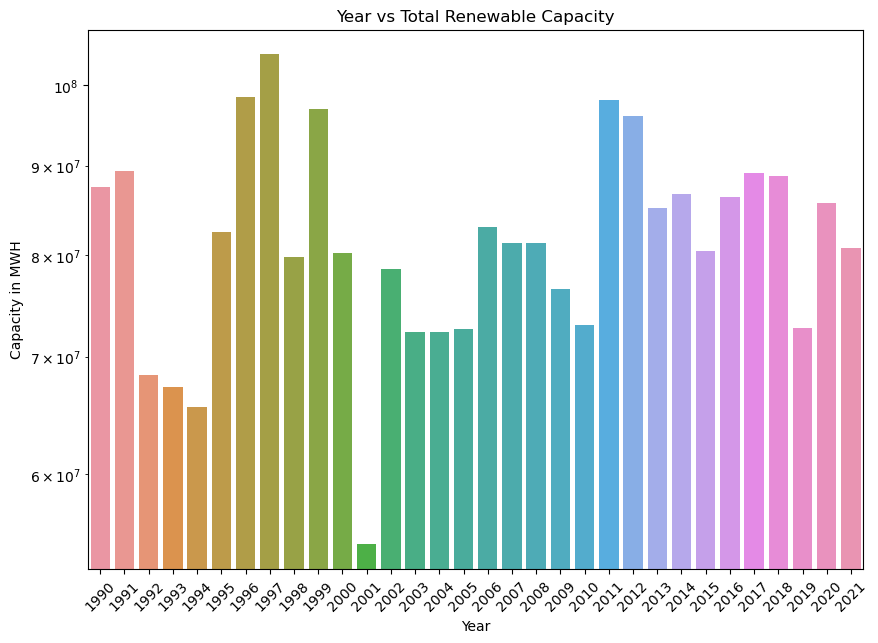

In [8]:
fig=plt.figure(figsize = (10, 7))
bp = sns.barplot(y="Total", x = 'Year',data=redfy)
bp.set_yscale("log")
plt.title('Year vs Total Renewable Capacity')
plt.xlabel('Year')
plt.ylabel('Capacity in MWH')
plt.xticks(rotation=45)
plt.show()

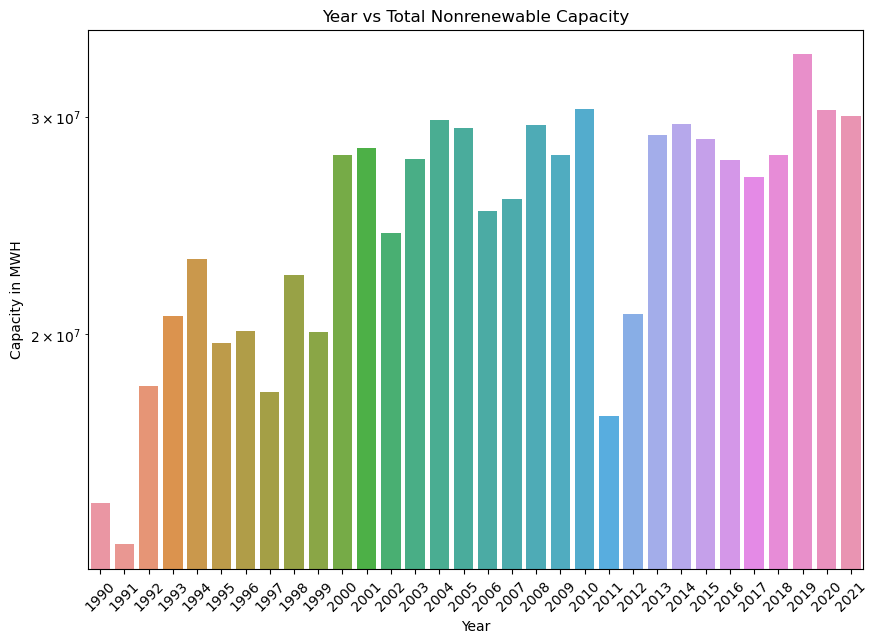

In [9]:
fig=plt.figure(figsize = (10, 7))
bp = sns.barplot(y="Total", x = 'Year',data=nrdfy)
bp.set_yscale("log")
plt.title('Year vs Total Nonrenewable Capacity')
plt.xlabel('Year')
plt.ylabel('Capacity in MWH')
plt.xticks(rotation=45)
plt.show()

In [10]:
X=x

X=X.reshape(-1,1)
y=y.reshape(-1,1)
yre=yre.reshape(-1,1)
ynr=ynr.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_test, yre_train, yre_test = train_test_split(X, yre, test_size = 0.2, random_state = 0)
X_train, X_test, ynr_train, ynr_test = train_test_split(X, ynr, test_size = 0.2, random_state = 0)

In [11]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(X_test)
X_norm = min_max_scaler.transform(X)

In [12]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)

In [13]:
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 0)
#classifier.fit(X_train, y_train)
from sklearn import datasets, linear_model, metrics

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score

classifier = linear_model.LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [14]:
classifier.predict(X_train)

array([[1.11943765e+08],
       [1.09473358e+08],
       [1.06591216e+08],
       [1.11120296e+08],
       [1.03297340e+08],
       [1.08238154e+08],
       [1.04532544e+08],
       [1.13590702e+08],
       [1.11532030e+08],
       [1.10708561e+08],
       [1.01650403e+08],
       [1.14002437e+08],
       [1.03709075e+08],
       [1.02885606e+08],
       [1.08649889e+08],
       [1.13178968e+08],
       [1.09061623e+08],
       [1.04944278e+08],
       [1.04120809e+08],
       [1.12355499e+08],
       [1.02473871e+08],
       [1.01238668e+08],
       [1.09885092e+08],
       [1.07414685e+08],
       [1.06179482e+08]])

Text(0, 0.5, 'Capacity in MWH')

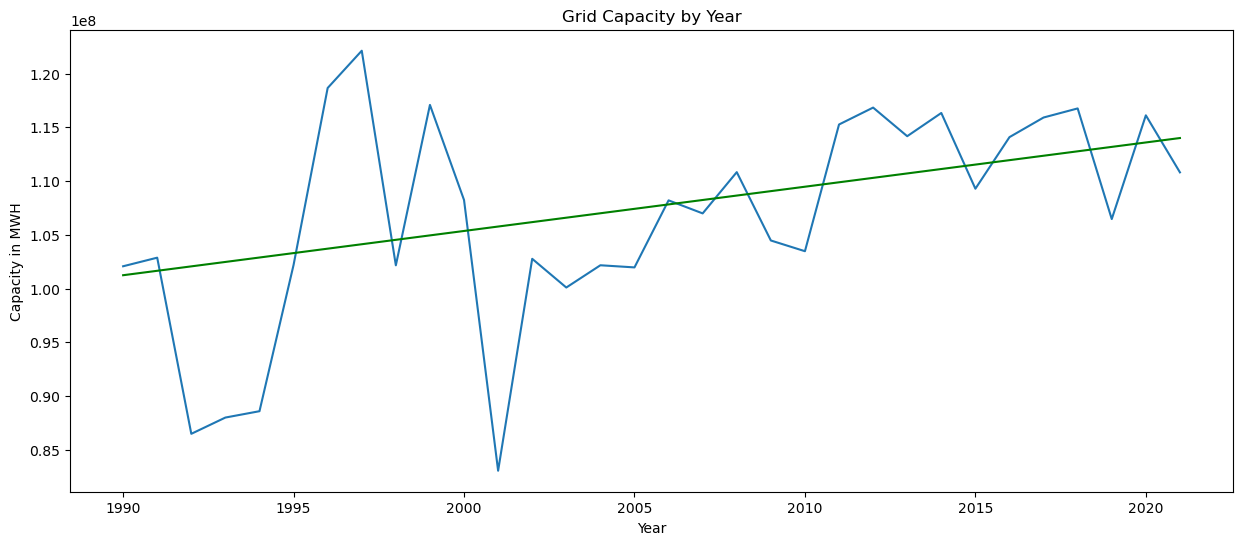

In [15]:
#x=X_train
#y=y_train
n = np.size(x)

y_pred = classifier.predict(X)
    
fig=plt.figure(figsize = (15,6))
plt.title('Grid Capacity by Year')
plt.plot(x,y)
plt.plot(X, y_pred, color = 'green')
plt.xlabel('Year')
plt.ylabel('Capacity in MWH')

In [16]:
print('Variance score: {}'.format(classifier.score(X_test, y_test)))

Variance score: 0.2324737503981994


In [17]:
# model evaluation
mse=mean_squared_error(y,y_pred)
  
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
  
# printing values
print('Slope:' ,classifier.coef_)
print('Intercept:', classifier.intercept_)
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[411734.48055158]]
Intercept: [-7.18112948e+08]
MSE: 70829600173261.72
Root mean squared error:  8416032.32962313
R2 score:  0.25162451506693917


In [18]:
def avgdiff(a,b):
    c = abs(a-b)
    c = np.average(c)
    return c

In [19]:
print('Mean Error: {}' .format(np.average(abs(y_pred-y))))
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Mean Error: 6254128.057123018
MSE: 70829600173261.72
Root mean squared error:  8416032.32962313
R2 score:  0.25162451506693917


In [20]:
c = avgdiff(y_pred, y)
c

6254128.057123018

In [21]:
y_pred_high = y_pred + c
y_pred_low = y_pred - c

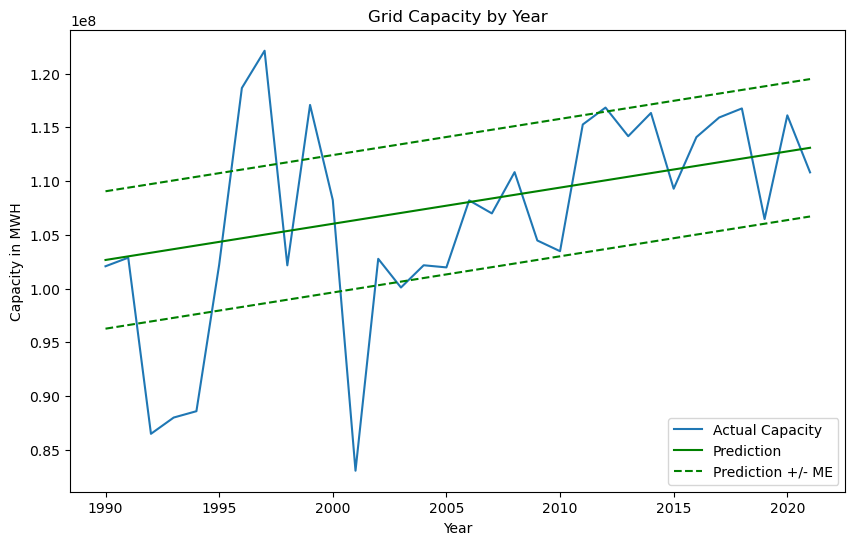

In [27]:
fig=plt.figure(figsize = (10,6))
plt.title('Grid Capacity by Year')
plt.plot(x,y, label = 'Actual Capacity')
plt.plot(X, y_pred, color = 'green', label = 'Prediction')
plt.plot(X, y_pred_high, 'g--', label ='Prediction +/- ME')
plt.plot(X, y_pred_low, 'g--')
plt.legend(loc = 'lower right')
plt.xlabel('Year')
plt.ylabel('Capacity in MWH')
fig.savefig('Grid Capacity', bbox_inches='tight', dpi=150)

In [23]:
Xfuture = np.arange(0,50) + 2022

Xfuture=Xfuture.reshape(-1,1)

futurepredict = np.append(y, classifier.predict(Xfuture))
futurepredict= futurepredict.reshape(-1,1)

In [24]:
df_output = pd.DataFrame(futurepredict, columns = ["Predicted_MWH"])
df_output["Year"] = np.arange(1990,(1990+82))
df_output.to_csv('predicted_grid.csv', index=False)

In [25]:
df_output

,Predicted_MWH,Year
0,1.020715e+08,1990
1,1.028706e+08,1991
2,8.648243e+07,1992
3,8.799578e+07,1993
4,8.858648e+07,1994
...,...,...
77,1.329422e+08,2067
78,1.333540e+08,2068
79,1.337657e+08,2069
80,1.341774e+08,2070


Mean Error: 6392154.637011902
MSE: 73702080718819.69
Root mean squared error:  8584991.596898606
R2 score:  0.22127429402962995


NameError: name 'yre_pred' is not defined

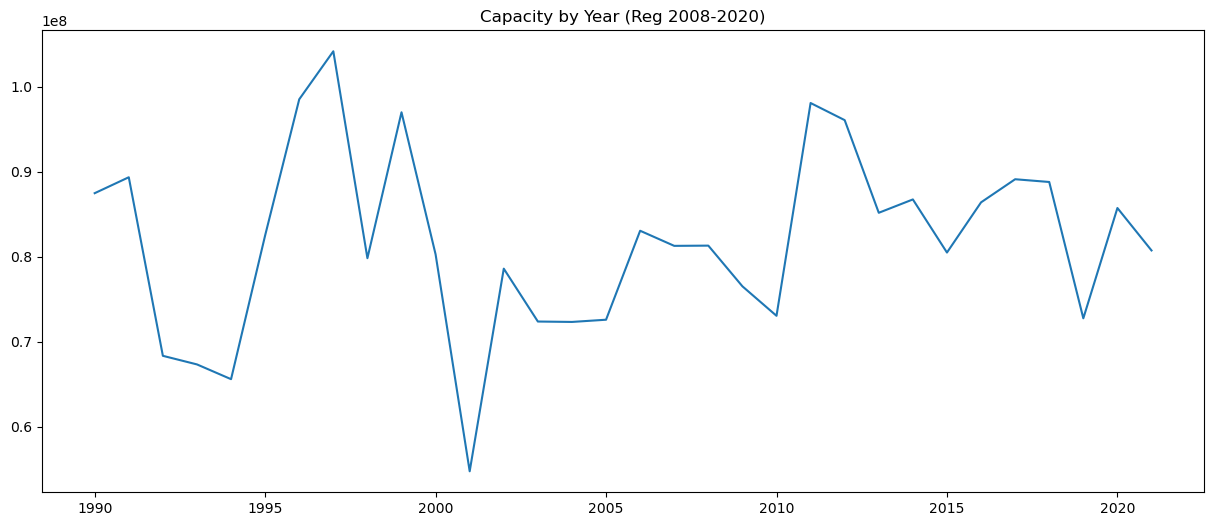

In [26]:
classifier.fit(X_train[10:32], y_train[10:32])
y_pred = classifier.predict(X)

mse=mean_squared_error(y,y_pred)
  
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print('Mean Error: {}' .format(np.average(abs(y_pred-y))))
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

c = avgdiff(y_pred, y)

y_pred_high = y_pred + c
y_pred_low = y_pred - c

fig=plt.figure(figsize = (15,6))
plt.title('Capacity by Year (Reg 2008-2020)')
plt.plot(x,yre, label = 'Actual Capacity')
plt.plot(X, yre_pred, color = 'green', label = 'Prediction')
plt.plot(X, yre_pred_high, 'g--', label ='Prediction +/- ME')
plt.plot(X, yre_pred_low, 'g--')
plt.legend(loc = 'lower right')
plt.xlabel('Year')
plt.ylabel('Capacity in MWH')

In [ ]:
classifier.fit(X_train, yre_train)
yre_pred = classifier.predict(X)

mse=mean_squared_error(yre,yre_pred)
  
rmse = np.sqrt(mean_squared_error(yre, yre_pred))
r2 = r2_score(yre, yre_pred)

print('Mean Error: {}' .format(np.average(abs(yre_pred-yre))))
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

c = avgdiff(yre_pred, yre)

yre_pred_high = yre_pred + c
yre_pred_low = yre_pred - c

fig=plt.figure(figsize = (15,6))
plt.title('Renewable Capacity by Year')
plt.plot(x,yre, label = 'Actual Capacity')
plt.plot(X, yre_pred, color = 'green', label = 'Prediction')
plt.plot(X, yre_pred_high, 'g--', label ='Prediction +/- ME')
plt.plot(X, yre_pred_low, 'g--')
plt.legend(loc = 'lower right')
plt.xlabel('Year')
plt.ylabel('Capacity in MWH')

In [ ]:
classifier.fit(X_train, ynr_train)
ynr_pred = classifier.predict(X)

mse=mean_squared_error(ynr,ynr_pred)
  
rmse = np.sqrt(mean_squared_error(ynr, ynr_pred))
r2 = r2_score(yre, ynr_pred)

print('Mean Error: {}' .format(np.average(abs(ynr_pred-ynr))))
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

c = avgdiff(ynr_pred, ynr)

ynr_pred_high = ynr_pred + c
ynr_pred_low = ynr_pred - c

fig=plt.figure(figsize = (15,6))
plt.title('Nonrenewable Capacity by Year')
plt.plot(x,ynr, label = 'Actual Capacity')
plt.plot(X, ynr_pred, color = 'green', label = 'Prediction')
plt.plot(X, ynr_pred_high, 'g--', label ='Prediction +/- ME')
plt.plot(X, ynr_pred_low, 'g--')
plt.legend(loc = 'lower right')
plt.xlabel('Year')
plt.ylabel('Capacity in MWH')

In [ ]:
df.pop('Year')
df.pop('Total')

In [ ]:
#splitting data
#column_indices = {name: i for i, name in enumerate(df.columns)}
n = len(df)
train_df = df[0:int(n*0.8)] 
test_df = df[int(n*0.8):]
num_features = df.shape[-1]
ntrain = len(train_df)
df